## **YAP 101 Homework-3**  
Due Date: 19 March 2020 23:59

Upload your files to uzak.etu.edu.tr

**Question 1 (50 Points).** Several years ago, there was a documentary on Discovery Channel about a Russian girl who claims that she can find the previously injured body parts of the people by just looking at them. The local people were convinced about the girl's talent. It was amazing because she just looks at the people and says "you had an operation or have a problem here" etc. The producer of the document also challenges her talent and he is also shocked that she could find an old injury he had some time ago. So he takes her to US to show scientists and ask them to test her talent. The scientists set up an experiment where there are seven people with known medical history. They write down the medical history of each person and shuffle the cards. Then they ask the girl to match the cards with the correct people. If she can correctly match 5 of them, they will think that she has really some talent in this issue. Note that she cannot have 6 matches because one mistake will also cause another mistake. However, she could correctly match only 4 of them. So they thought that her talent is bogus and did not believe her. 

More formally, their null hypothesis is "people can have four matches even though they select randomly" and alternative hypothesis is "the girl has a talent because it is not likely to have 4 matches if she selects randomly"

So the scientists accepted the null hypothesis. Would you also accept the null hypothesis? Why/Why not?

In [1]:
import pandas as pd
import numpy as np
from math import factorial

arr = [0,1,2,3,4,5,6]

def numOfCor(x): #for calculating number of correct selections on randomly sampled array has
    numOf = 7
    for i in range(7):
        if x[i] != i:
            numOf-=1
    return numOf

def simulation(time,origin):
    df = pd.DataFrame({"People":origin})
    numOfArray = [] #holds number of mistakes for each trials
    for i in range(time):
        mixedSample = df.sample(7, replace = False)["People"].array
        numOfArray.append(numOfCor(mixedSample))
        
    return numOfArray    

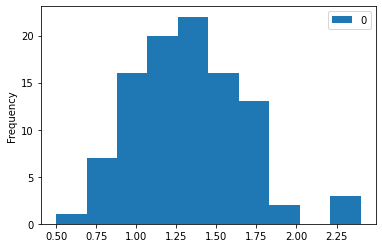

In [2]:
def p(times,which):
    if which == 6:
        return 0
    prob = []
    for i in range(times):
        sim = simulation(1000,arr)
        df = pd.DataFrame({"value" : sim,"num" : 1})
        df = df.groupby("value").count()
        df = df.apply(lambda x: (x/1000)*100) #probability calculation as a percentage
        if which in df.index:
            prob.append(df.loc[which][0])
    df = pd.DataFrame(prob)
    df.plot(kind = "hist")
    
p(100,4)

Suppose we run our test at the five percent significance level each time. We will reject our null hypothesis if anyone randomly gets 4 correct in 5 or less of 100 trials. As you can see we did our simulation for 100 times and every probability is less than 5. Our null hypothesis seems very unlikely. So I wouldn't accept the null hypothesis.

**Question 2 (30 Points)** Out of seven people, the girl tries to macth diseases with the people. Let N be the number of her correct matches. For which values of N, you would accept the alternative hypothesis? Justify your answer.

**First look at the probability distribution of all possible values of N.**

Zero:


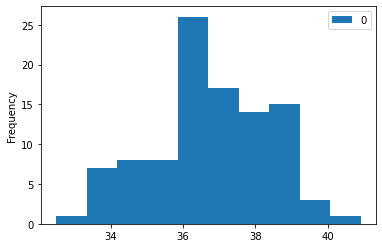

In [3]:
print("Zero:")
p(100,0)

One:


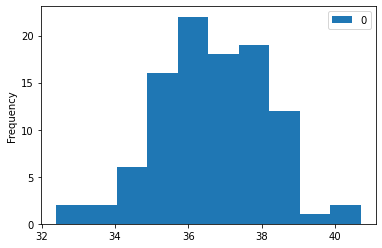

In [4]:
print("One:")
p(100,1)

Two:


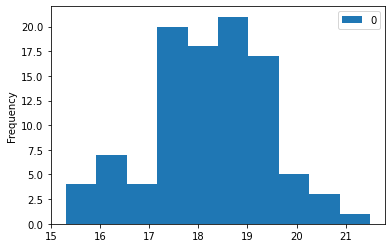

In [5]:
print("Two:")
p(100,2)

Three:


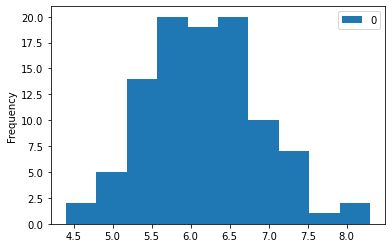

In [6]:
print("Three:")
p(100,3)

Four:


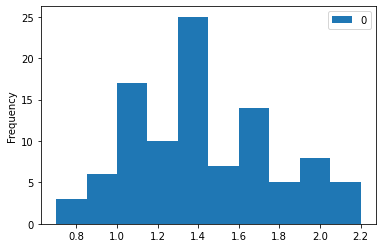

In [7]:
print("Four:")
p(100,4)

Five


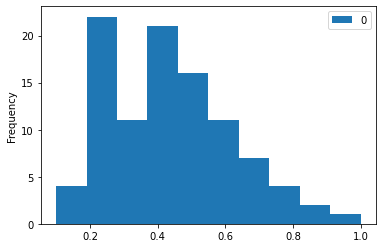

In [8]:
print("Five")
p(100,5)

Seven


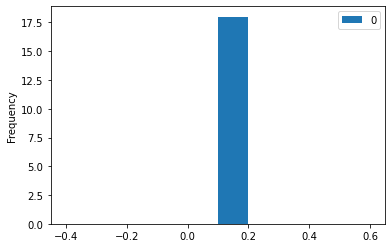

In [9]:
print("Seven")
p(100,7)

As can be seen from the distributions, the probabilities started to drop below five percent after N=4. I would only accept the values of N=4,5,7. The probability of other values is more possible than these.

**Question 3 (20 Points)** The scientists would believe her if she had five matches. Let us assume that she has not five, but seven matches.  Then would you still question her talent? If you would question her talent, why?

According to our simulations, the probability of 7 is lower than the probability of 5. Even 7 does not happen at all in some simulations. Therefore, I accept our alternative hypothesis even if it has seven truths. But I still question her ability because N=7 is possible, although unlikely.